### Investigate the TGF-beta loadings for Factor 2 and Factor 5, which have a significant PROGENY pathway enrichment for TGF-beta

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [29]:
!pip install adjustText

In [30]:
from adjustText import adjust_text

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
working_dir = "/content/drive/MyDrive/Lab_Research/liana_final/"

# change to the working directory
os.chdir(working_dir)

In [33]:
Factor_5_TGF_df = pd.read_csv("Factor_5_TGFb_loadings.csv", index_col = 0)

### Highlight collagen and integrin genes

In [34]:
Factor_5_TGF_df['is_integrin'] = Factor_5_TGF_df['interaction'].str.contains('ITG')
Factor_5_TGF_df['is_collagen'] = Factor_5_TGF_df['interaction'].str.contains('COL')

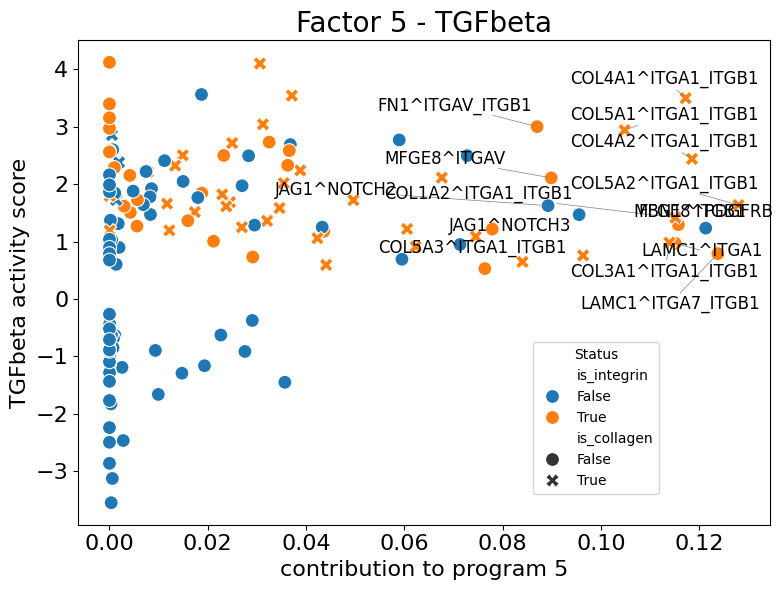

In [37]:
plt.figure(figsize=(8,6))

sns.scatterplot(data=Factor_5_TGF_df,
                x='Loadings', y='weight',
                 hue='is_integrin',
                style='is_collagen',
                s=100)

# select points to label - e.g., based on loadings or weight values (top 10 in this case)
top_labels = Factor_5_TGF_df.nlargest(15c, 'Loadings')

# add labels to specific points
texts = []
for _, row in top_labels.iterrows():
    texts.append(plt.text(row['Loadings'], row['weight'], row['interaction'],
                          ha='center', va='bottom', fontsize=12))

# adjust text to repel
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))
plt.legend(title='Status', bbox_to_anchor=(0.85, 0.05), loc='lower right')
plt.title("Factor 5 - TGFbeta",  fontsize=20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel("TGFbeta activity score", fontsize=16)
plt.xlabel("contribution to program 5", fontsize=16)
plt.tight_layout()
plt.savefig("Factor_5_TGF_beta_loadings_plots.pdf")
plt.show()